In [1]:
# !pip install numpy pandas matplotlib mysql-connector-python

In [2]:
# !pip install openpyxl

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## import data from excel

### Basic EDA 
---
removing the data outlier

In [4]:
df = pd.read_excel('filtered_cars.xlsx')

In [5]:
# Filter MUV and MPV cars
muv_cars = df[df['Body_type'].str.upper() == 'MUV']
mpv_cars = df[df['Body_type'].str.upper() == 'MPV']

# Merge on make, model, and variant to find common cars
common_cars = pd.merge(
    muv_cars[['make', 'model', 'variant']],
    mpv_cars[['make', 'model', 'variant']],
    on=['make', 'model', 'variant'],
    how='inner'
)

if not common_cars.empty:
    print("Cars present in both MUV and MPV types (same make, model, and variant):")
    print(common_cars)
else:
    print("No cars found with the same make, model, and variant in both MUV and MPV types.")

No cars found with the same make, model, and variant in both MUV and MPV types.


In [6]:
# Get the relevant columns for display
muv_display = muv_cars[['make', 'model', 'variant']].reset_index(drop=True)
mpv_display = mpv_cars[['make', 'model', 'variant']].reset_index(drop=True)

# Pad the shorter DataFrame so both have the same number of rows
max_len = max(len(muv_display), len(mpv_display))
muv_display = muv_display.reindex(range(max_len))
mpv_display = mpv_display.reindex(range(max_len))

# Combine side by side for display
combined = pd.concat([muv_display, mpv_display], axis=1, keys=['MUV', 'MPV'])
combined.columns = [
    'MUV_Make', 'MUV_Model', 'MUV_Variant',
    'MPV_Make', 'MPV_Model', 'MPV_Variant'
]

# Concatenate make, model, and variant for display
muv_display_str = muv_display.apply(lambda row: f"{row['make']} | {row['model']} | {row['variant']}", axis=1)
mpv_display_str = mpv_display.apply(lambda row: f"{row['make']} | {row['model']} | {row['variant']}", axis=1)

# Combine into a DataFrame for side-by-side display
side_by_side = pd.DataFrame({
    'MUV': muv_display_str,
    'MPV': mpv_display_str
})


In [7]:
side_by_side

,MUV,MPV
0,Toyota | Innova Crysta | 2.4 Gx 7 Str,Maruti Suzuki | Eeco | 5 Str
1,Toyota | Innova Crysta | 2.4 Vx 7 Str,Maruti Suzuki | Eeco | 7 Str
2,Toyota | Innova Crysta | 2.4 Gx 8 Str,Maruti Suzuki | Eeco | 5 Str With Ac+Htr
3,Toyota | Innova Crysta | 2.4 Vx 8 Str,Maruti Suzuki | Eeco | 5 Str With Ac+Htr Cng
4,Toyota | Innova Crysta | 2.4 Zx 7 Str,Maruti Suzuki | Eeco | 5 Str With Htr Cng
5,Toyota | Innova Crysta | 2.7 Gx At 8 Str,Mercedes-Benz | Mercedes-Benz B-Class | B 180 ...
6,Toyota | Innova Crysta | 2.7 Gx At 7 Str,Mercedes-Benz | Mercedes-Benz B-Class | B 200 ...
7,Toyota | Innova Crysta | 2.7 Zx At 7 Str,Mercedes-Benz | Mercedes-Benz B-Class | B 180 ...
8,Toyota | Innova Crysta | 2.7 Vx 7 Str,Mercedes-Benz | Mercedes-Benz B-Class | B 200 ...
9,Toyota | Innova Crysta | 2.7 Gx Mt 7 Str,Maruti Suzuki | Xl6 | Zeta Mt


In [8]:
df.head()

,make,model,variant,Ex-showroom_price_inr,Displacement_cc,Cylinders,Fuel_tank_capacity_litres,Fuel_type,Height_mm,Length_mm,...,Torque_nm,Seating_capacity,Type,Basic_warranty_years,Boot_space_litres,Sun_visor,Ventilation_system,ABS,Airbags,Colour
0,Hyundai,Venue,1.0 Turbo Gdi Mt Sx Dual Tone,974000,998,4,45,Petrol,1590,3995,...,172.0,5,Manual,2,350,Yes,Yes,Yes,Yes,Pink
1,Bmw,X3,Xdrive20D Xline,5600000,1995,4,67,Diesel,1678,4657,...,400.0,5,Automatic,2,550,Yes,Yes,Yes,Yes,Pink
2,Toyota,Fortuner,Trd Celebratory Edition,3420000,2755,4,80,Diesel,1835,4795,...,450.0,7,Automatic,3,296,Yes,Yes,Yes,Yes,Orange
3,Hyundai,Creta,1.6 Vtvt Sx,1232534,1591,4,55,Petrol,1630,4270,...,151.0,5,Manual,3,475,Yes,Yes,Yes,Yes,Green
4,Mahindra,Nuvosport,N6 Amt,972359,1493,3,60,Diesel,1870,3985,...,240.0,7,Automatic,2,412,Yes,Yes,Yes,Yes,Orange


In [9]:
# Filter df to include only Petrol, Diesel, and CNG cars
df = df[df['Fuel_type'].isin(['Petrol', 'Diesel', 'CNG'])].reset_index(drop=True)

Fuel_type
Petrol    250
Diesel    238
CNG         9
Name: count, dtype: int64


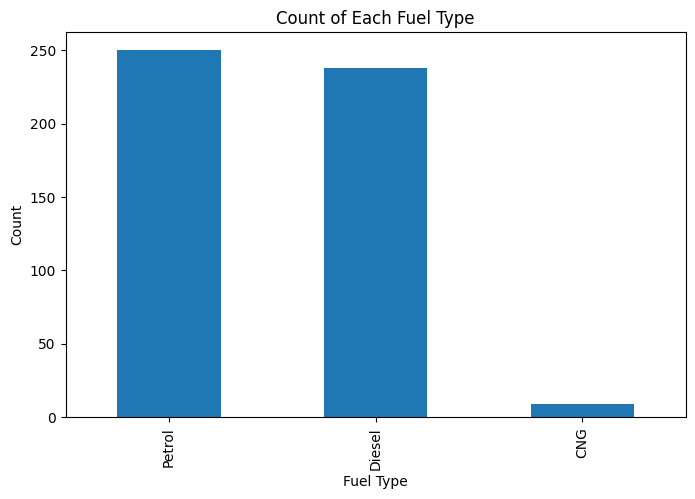

In [10]:
# Count the occurrences of each fuel type
fuel_counts = df['Fuel_type'].value_counts()
print(fuel_counts)
# Plot the bar diagram
fuel_counts.plot(kind='bar', figsize=(8, 5), title='Count of Each Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [11]:
transmission_type = df['Type'].value_counts()
print(transmission_type)

Type
Manual       324
Automatic    157
AMT           12
DCT            2
CVT            2
Name: count, dtype: int64


In [12]:
df = df[df['Type'].isin(['Manual', 'Automatic'])].reset_index(drop=True)
#after filtering the transmission type
transmission_type = df['Type'].value_counts()
print(transmission_type)

Type
Manual       324
Automatic    157
Name: count, dtype: int64


In [13]:
print(df['Seating_capacity'].value_counts())



Seating_capacity
5     337
7      81
6      20
4      18
8      13
9       8
2       3
16      1
Name: count, dtype: int64


In [14]:
# Remove cars with Seating_capacity == 16
df = df[df['Seating_capacity'] != 16].reset_index(drop=True)

In [15]:
print(df['Seating_capacity'].value_counts())

Seating_capacity
5    337
7     81
6     20
4     18
8     13
9      8
2      3
Name: count, dtype: int64


In [16]:
df[df['Seating_capacity'] == 2]

,make,model,variant,Ex-showroom_price_inr,Displacement_cc,Cylinders,Fuel_tank_capacity_litres,Fuel_type,Height_mm,Length_mm,...,Torque_nm,Seating_capacity,Type,Basic_warranty_years,Boot_space_litres,Sun_visor,Ventilation_system,ABS,Airbags,Colour
462,Mercedes-Benz,Mercedes-Benz Amg-Gt,S,21583466,3982,8,75,Petrol,1288,4546,...,650.0,2,Automatic,2,350,Yes,Yes,Yes,Yes,Brown
463,Mercedes-Benz,Mercedes-Benz Amg-Gt,R,23264134,3982,8,75,Petrol,1284,4551,...,700.0,2,Automatic,2,350,Yes,Yes,Yes,Yes,Silver
464,Mercedes-Benz,Mercedes-Benz Amg-Gt,Roadster,22733626,3982,8,75,Petrol,1259,4544,...,630.0,2,Automatic,2,165,Yes,Yes,Yes,Yes,Blue


In [17]:
# Define price ranges (in INR)
price_ranges = [
    ("Upto 3 Lakhs", 0, 300000),
    ("2-5 Lakh", 200000, 500000),
    ("5-8 Lakh", 500000, 800000),
    ("6-10 Lakh", 600000, 1000000),
    ("8-12 Lakh", 800000, 1200000),
    ("10-15 Lakh", 1000000, 1500000),
    ("10-20 Lakh", 1000000, 2000000),
    ("20-30 Lakh", 2000000, 3000000),
    ("30-40 Lakh", 3000000, 4000000),
    ("40-50 Lakh", 4000000, 5000000),
    ("50Lakh-1 Crore", 5000000, 10000000),
    ("above 1 Crore", 10000000, float('inf'))
]

# Count cars in each price range
price_counts = []
for label, low, high in price_ranges:
    count = df[(df['Ex-showroom_price_inr'] >= low) & (df['Ex-showroom_price_inr'] < high)].shape[0]
    price_counts.append((label, count))

# Display the counts
for label, count in price_counts:
    print(f"{label}: {count}")

Upto 3 Lakhs: 5
2-5 Lakh: 36
5-8 Lakh: 139
6-10 Lakh: 195
8-12 Lakh: 143
10-15 Lakh: 83
10-20 Lakh: 116
20-30 Lakh: 18
30-40 Lakh: 14
40-50 Lakh: 8
50Lakh-1 Crore: 30
above 1 Crore: 21


In [18]:
print(df['Power_steering'].value_counts())

Power_steering
Electric Power       408
Undefined Powered     21
Non Powered           21
Hydraulic Power       18
Electro-Hydraulic     12
Name: count, dtype: int64


In [19]:
df = df[~df['Power_steering'].isin(['Non Powered', 'Undefined Powered'])].reset_index(drop=True)

In [20]:
print(df['Power_steering'].value_counts())

Power_steering
Electric Power       408
Hydraulic Power       18
Electro-Hydraulic     12
Name: count, dtype: int64


In [21]:
print(df[['Keyless_entry','Sun_visor', 'Ventilation_system', 'ABS', 'Airbags']].value_counts())

Keyless_entry  Sun_visor  Ventilation_system  ABS  Airbags
Yes            Yes        Yes                 Yes  Yes        378
                                              No   No          19
                                                   Yes         16
               No         Yes                 Yes  Yes         12
               Yes        Yes                 Yes  No           9
               No         Yes                 Yes  No           4
Name: count, dtype: int64


In [22]:
# Convert 'Yes'/'No' columns to boolean True/False in df
yes_no_columns = ['Keyless_entry', 'Sun_visor', 'Ventilation_system', 'ABS', 'Airbags']

for col in yes_no_columns:
    if col in df.columns:
        df[col] = df[col].map({'Yes': True, 'No': False})

df[yes_no_columns].head()

,Keyless_entry,Sun_visor,Ventilation_system,ABS,Airbags
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True


## make Car Brands with Unique Car brand ID

In [23]:
# Extract unique car brands and assign a unique ID to each
car_brands = df[['make']].drop_duplicates().reset_index(drop=True)
#Fist 3 letters of make + index + 100 = Car_id
car_brands['brand_id'] = car_brands['make'].str[:3].str.upper() + (car_brands.index + 101).astype(str)

# Display the resulting table
print(car_brands)

            make brand_id
0        Hyundai   HYU101
1            Bmw   BMW102
2         Toyota   TOY103
3       Mahindra   MAH104
4  Mercedes-Benz   MER105
5           Tata   TAT106
6          Honda   HON107
7           Ford   FOR108
8  Maruti Suzuki   MAR109


In [24]:
print(df['make'].value_counts())

make
Maruti Suzuki    79
Hyundai          75
Mahindra         59
Tata             55
Toyota           45
Mercedes-Benz    40
Honda            36
Ford             27
Bmw              22
Name: count, dtype: int64


Add the BrandID to the df

In [25]:
brand_id_map = dict(zip(car_brands['make'], car_brands['brand_id']))
# Add a Brand_ID column to the df DataFrame
df['Brand_ID'] = df['make'].map(brand_id_map)
# Display the updated DataFrame
df.head()

,make,model,variant,Ex-showroom_price_inr,Displacement_cc,Cylinders,Fuel_tank_capacity_litres,Fuel_type,Height_mm,Length_mm,...,Seating_capacity,Type,Basic_warranty_years,Boot_space_litres,Sun_visor,Ventilation_system,ABS,Airbags,Colour,Brand_ID
0,Hyundai,Venue,1.0 Turbo Gdi Mt Sx Dual Tone,974000,998,4,45,Petrol,1590,3995,...,5,Manual,2,350,True,True,True,True,Pink,HYU101
1,Bmw,X3,Xdrive20D Xline,5600000,1995,4,67,Diesel,1678,4657,...,5,Automatic,2,550,True,True,True,True,Pink,BMW102
2,Toyota,Fortuner,Trd Celebratory Edition,3420000,2755,4,80,Diesel,1835,4795,...,7,Automatic,3,296,True,True,True,True,Orange,TOY103
3,Hyundai,Creta,1.6 Vtvt Sx,1232534,1591,4,55,Petrol,1630,4270,...,5,Manual,3,475,True,True,True,True,Green,HYU101
4,Mahindra,Nuvosport,N6 Amt,972359,1493,3,60,Diesel,1870,3985,...,7,Automatic,2,412,True,True,True,True,Orange,MAH104


 ## make the dealers_df
The `dealers_df` DataFrame contains information about car dealers, including their personal details, dealership information, and unique usernames. Each dealer is associated with a car brand, and the brand is mapped to a unique `brand_id` using the `car_brands` DataFrame. The columns in `dealers_df` include:

- Name: Dealer's full name
- password: Password for dealer login (for demonstration purposes)
- Email: Dealer's email address
- Address: Dealer's address
- City: City where the dealer is located
- pin: Postal code of the dealer's location
- Car_Company: The car brand the dealer represents
- Age: Dealer's age
- gender: Dealer's gender
- userName: A unique username generated for each dealer, combining parts of their name and brand_id

This DataFrame is used to create the dealers table in the MySQL database and to manage dealer-related operations in the workflow.

In [26]:
import random
import string

def generate_dealer_usernames(df):
    """
    Generate unique dealer usernames such that if two dealers have the same alphabetic part (e.g., D_ARUNTAT),
    the first gets 001, the second gets 003, the third 005, etc. (odd numbers only).
    """
    # Create the base username (without the number)
    base_usernames = (
        "D_" +
        df['Name'].apply(lambda x: x.split()[0].upper()) +
        df['brand_id'].str[:3].str.upper()
    )
    # Count occurrences for each base username
    username_counts = {}
    usernames = []
    for base in base_usernames:
        count = username_counts.get(base, 0)
        # Odd numbers: 001, 002, 003, ...
        num = 1 + count
        usernames.append(f"{base}{str(num).zfill(3)}")
        username_counts[base] = count + 1
    return usernames

# Create a DataFrame for dealers with realistic details
def generate_password(name):
    """Generate password as name + '@' + 3 random digits + '$'."""
    name = name.split()[0]
    digits = ''.join(random.choices(string.digits, k=3))
    return f"{name.replace(' ', '')}@{digits}$"

dealers_data = {
    'Name': [
        'Arun Kumar', 'Priya Sharma', 'Ramesh Babu', 'Divya Menon', 'Karthik Raja', 'Sneha Iyer',
        'Vijay Anand', 'Meera Nair', 'Suresh Reddy', 'Arun Sharma', 'Rajesh Khanna', 'Pooja Patel',
        'Senthil Kumar', 'Lakshmi Narayanan', 'Sivakumar Subramanian', 'Revathi Balaji', 'Gopinath Ram',
        'Shanthi Ramesh', 'Balaji Srinivasan', 'Kavitha Murugan', 'Deepak Joshi', 'Anjali Verma',
        'Manoj Pillai', 'Ritu Agarwal', 'Harish Kumar', 'Neha Suresh', 'Prakash Menon', 'Asha Rani',
        'Sanjay Gupta', 'Vidya Krishnan'
    ],
    'password': [generate_password(name) for name in [
        'Arun Kumar', 'Priya Sharma', 'Ramesh Babu', 'Divya Menon', 'Karthik Raja', 'Sneha Iyer',
        'Vijay Anand', 'Meera Nair', 'Suresh Reddy', 'Arun Sharma', 'Rajesh Khanna', 'Pooja Patel',
        'Senthil Kumar', 'Lakshmi Narayanan', 'Sivakumar Subramanian', 'Revathi Balaji', 'Gopinath Ram',
        'Shanthi Ramesh', 'Balaji Srinivasan', 'Kavitha Murugan', 'Deepak Joshi', 'Anjali Verma',
        'Manoj Pillai', 'Ritu Agarwal', 'Harish Kumar', 'Neha Suresh', 'Prakash Menon', 'Asha Rani',
        'Sanjay Gupta', 'Vidya Krishnan'
    ]],
    'Email': [
        'arun.kumar@gmail.com', 'priya.sharma@gmail.com', 'ramesh.babu@gmail.com',
        'divya.menon@gmail.com', 'karthik.raja@gmail.com', 'sneha.iyer@gmail.com',
        'vijay.anand@gmail.com', 'meera.nair@gmail.com', 'suresh.reddy@gmail.com',
        'arun.gupta@gmail.com', 'rajesh.khanna@gmail.com', 'pooja.patel@gmail.com',
        'senthil.kumar@tnmail.com', 'lakshmi.narayanan@tnmail.com', 'sivakumar.subramanian@tnmail.com',
        'revathi.balaji@tnmail.com', 'gopinath.ram@tnmail.com', 'shanthi.ramesh@tnmail.com',
        'balaji.srinivasan@tnmail.com', 'kavitha.murugan@tnmail.com', 'deepak.joshi@gmail.com',
        'anjali.verma@gmail.com', 'manoj.pillai@gmail.com', 'ritu.agarwal@gmail.com',
        'harish.kumar@gmail.com', 'neha.suresh@gmail.com', 'prakash.menon@gmail.com',
        'asha.rani@gmail.com', 'sanjay.gupta@gmail.com', 'vidya.krishnan@gmail.com'
    ],
    'Phone': [
        '9876543210', '9123456780', '9988776655', '9876501234', '9123409876', '9988123456',
        '9876123450', '9123987654', '9988345678', '9876234567', '9123567890', '9988456123',
        '9876345678', '9123678901', '9988561234', '9876456789', '9123789012', '9988672345',
        '9876567890', '9123890123', '9876612345', '9123912345', '9988712345', '9876623456',
        '9123923456', '9988723456', '9876634567', '9123934567', '9988734567', '9876645678'
    ],
    'Address': [
        'No. 12, Anna Nagar, Chennai', 'No. 45, Gandhi Road, Coimbatore', 'No. 78, MG Street, Madurai',
        'No. 23, Park Avenue, Tiruchirappalli', 'No. 56, Raja Street, Salem', 'No. 89, Lake View, Erode',
        'No. 34, Temple Road, Tirunelveli', 'No. 67, Green Park, Vellore', 'No. 90, Sunrise Avenue, Thoothukudi',
        'No. 11, Hilltop Road, Dindigul', 'No. 22, River Side, Thanjavur', 'No. 33, Ocean Drive, Kanchipuram',
        'No. 101, Gandhi Salai, Karur', 'No. 202, Mela Street, Namakkal', 'No. 303, Bazaar Road, Theni',
        'No. 404, College Road, Sivakasi', 'No. 505, Main Road, Cuddalore', 'No. 606, Market Street, Tiruppur',
        'No. 707, South Street, Hosur', 'No. 808, North Street, Nagercoil', 'No. 909, West End, Chennai',
        'No. 123, Lotus Colony, Madurai', 'No. 234, Rose Street, Salem', 'No. 345, Jasmine Road, Erode',
        'No. 456, Orchid Lane, Vellore', 'No. 567, Lily Avenue, Thanjavur', 'No. 678, Tulip Street, Karur',
        'No. 789, Daisy Road, Namakkal', 'No. 890, Sunflower Lane, Theni', 'No. 901, Marigold Road, Sivakasi'
    ],
    'City': [
        'Chennai', 'Coimbatore', 'Madurai', 'Tiruchirappalli', 'Salem', 'Erode',
        'Tirunelveli', 'Vellore', 'Thoothukudi', 'Dindigul', 'Thanjavur', 'Kanchipuram',
        'Karur', 'Namakkal', 'Theni', 'Sivakasi', 'Cuddalore', 'Tiruppur', 'Hosur', 'Nagercoil',
        'Chennai', 'Madurai', 'Salem', 'Erode', 'Vellore', 'Thanjavur', 'Karur', 'Namakkal', 'Theni', 'Sivakasi'
    ],
    'pincode': [
        600001, 641001, 625001, 620001, 636001, 638001, 627001, 632001, 628001, 624001, 613001, 631501,
        639001, 637001, 625531, 626123, 607001, 641601, 635109, 629001, 600002, 625002, 636002, 638002,
        632002, 613002, 639002, 637002, 625532, 626124
    ],
    'Car_Company': [
        'Tata', 'Hyundai', 'Maruti Suzuki', 'Toyota', 'Ford', 'Mahindra',
        'Honda', 'Mercedes-Benz', 'Bmw', 'Tata', 'Hyundai', 'Maruti Suzuki',
        'Toyota', 'Ford', 'Mahindra', 'Honda', 'Mercedes-Benz', 'Bmw', 'Tata', 'Hyundai',
        'Maruti Suzuki', 'Toyota', 'Ford', 'Mahindra', 'Honda', 'Mercedes-Benz', 'Bmw', 'Tata', 'Hyundai', 'Maruti Suzuki'
    ],
    'Age': [
        35, 40, 28, 45, 32, 38, 29, 50, 33, 41, 36, 30, 39, 42, 37, 34, 48, 31, 44, 29,
        38, 27, 41, 36, 33, 39, 35, 32, 30, 28
    ],
    'gender': [
        'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
        'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
        'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'
    ]
}

# Create the DataFrame
dealers_df = pd.DataFrame(dealers_data)

# Map Car_Company to brand_id using car_brands DataFrame
brand_id_map = dict(zip(car_brands['make'], car_brands['brand_id']))
dealers_df['brand_id'] = dealers_df['Car_Company'].map(brand_id_map)


# Generate userName using the custom function
dealers_df['userName'] = generate_dealer_usernames(dealers_df)


dealers_df.drop(['brand_id'], axis=1, inplace=True)
# Display the dealers DataFrame
dealers_df

,Name,password,Email,Phone,Address,City,pincode,Car_Company,Age,gender,userName
0,Arun Kumar,Arun@239$,arun.kumar@gmail.com,9876543210,"No. 12, Anna Nagar, Chennai",Chennai,600001,Tata,35,Male,D_ARUNTAT001
1,Priya Sharma,Priya@890$,priya.sharma@gmail.com,9123456780,"No. 45, Gandhi Road, Coimbatore",Coimbatore,641001,Hyundai,40,Female,D_PRIYAHYU001
2,Ramesh Babu,Ramesh@894$,ramesh.babu@gmail.com,9988776655,"No. 78, MG Street, Madurai",Madurai,625001,Maruti Suzuki,28,Male,D_RAMESHMAR001
3,Divya Menon,Divya@516$,divya.menon@gmail.com,9876501234,"No. 23, Park Avenue, Tiruchirappalli",Tiruchirappalli,620001,Toyota,45,Female,D_DIVYATOY001
4,Karthik Raja,Karthik@365$,karthik.raja@gmail.com,9123409876,"No. 56, Raja Street, Salem",Salem,636001,Ford,32,Male,D_KARTHIKFOR001
5,Sneha Iyer,Sneha@566$,sneha.iyer@gmail.com,9988123456,"No. 89, Lake View, Erode",Erode,638001,Mahindra,38,Female,D_SNEHAMAH001
6,Vijay Anand,Vijay@429$,vijay.anand@gmail.com,9876123450,"No. 34, Temple Road, Tirunelveli",Tirunelveli,627001,Honda,29,Male,D_VIJAYHON001
7,Meera Nair,Meera@321$,meera.nair@gmail.com,9123987654,"No. 67, Green Park, Vellore",Vellore,632001,Mercedes-Benz,50,Female,D_MEERAMER001
8,Suresh Reddy,Suresh@848$,suresh.reddy@gmail.com,9988345678,"No. 90, Sunrise Avenue, Thoothukudi",Thoothukudi,628001,Bmw,33,Male,D_SURESHBMW001
9,Arun Sharma,Arun@201$,arun.gupta@gmail.com,9876234567,"No. 11, Hilltop Road, Dindigul",Dindigul,624001,Tata,41,Female,D_ARUNTAT002


In [27]:
# Map each brand to its available dealer usernames
brand_to_dealers = dealers_df.groupby('Car_Company')['userName'].apply(list).to_dict()

# Function to assign a random dealer username for each car based on its Brand_ID
def assign_dealer_username(row):
    # Find the brand name for this car
    brand = row['make']
    # Get the list of dealer usernames for this brand
    dealer_usernames = brand_to_dealers.get(brand, [])
    if dealer_usernames:
        return np.random.choice(dealer_usernames)
    else:
        return np.nan  # No dealer for this brand

# Assign DealerUsername to each car in df
df['DealerUsername'] = df.apply(assign_dealer_username, axis=1)

# Check that the assigned dealer's brand matches the car's brand
def check_brand_match(row):
    if pd.isna(row['DealerUsername']):
        return False
    dealer_row = dealers_df[dealers_df['userName'] == row['DealerUsername']]
    if dealer_row.empty:
        return False
    return dealer_row.iloc[0]['Car_Company'] == row['make']

df['DealerBrandMatch'] = df.apply(check_brand_match, axis=1)

# Display a summary of the check
print("All DealerUsername assignments have matching brands:",
      df['DealerBrandMatch'].all())

# Drop the check column after verification
df.drop(columns=['DealerBrandMatch'], inplace=True)

# Show the updated DataFrame
df[['make', 'model', 'Brand_ID', 'DealerUsername']].head()

All DealerUsername assignments have matching brands: True


,make,model,Brand_ID,DealerUsername
0,Hyundai,Venue,HYU101,D_PRIYAHYU001
1,Bmw,X3,BMW102,D_SHANTHIBMW001
2,Toyota,Fortuner,TOY103,D_SENTHILTOY001
3,Hyundai,Creta,HYU101,D_KAVITHAHYU001
4,Mahindra,Nuvosport,MAH104,D_SNEHAMAH001


In [28]:
# Replace Car_Company in dealers_df with the corresponding brand_id from car_brands
dealers_df['Brand_ID'] = dealers_df['Car_Company'].map(brand_id_map)
dealers_df.head()

,Name,password,Email,Phone,Address,City,pincode,Car_Company,Age,gender,userName,Brand_ID
0,Arun Kumar,Arun@239$,arun.kumar@gmail.com,9876543210,"No. 12, Anna Nagar, Chennai",Chennai,600001,Tata,35,Male,D_ARUNTAT001,TAT106
1,Priya Sharma,Priya@890$,priya.sharma@gmail.com,9123456780,"No. 45, Gandhi Road, Coimbatore",Coimbatore,641001,Hyundai,40,Female,D_PRIYAHYU001,HYU101
2,Ramesh Babu,Ramesh@894$,ramesh.babu@gmail.com,9988776655,"No. 78, MG Street, Madurai",Madurai,625001,Maruti Suzuki,28,Male,D_RAMESHMAR001,MAR109
3,Divya Menon,Divya@516$,divya.menon@gmail.com,9876501234,"No. 23, Park Avenue, Tiruchirappalli",Tiruchirappalli,620001,Toyota,45,Female,D_DIVYATOY001,TOY103
4,Karthik Raja,Karthik@365$,karthik.raja@gmail.com,9123409876,"No. 56, Raja Street, Salem",Salem,636001,Ford,32,Male,D_KARTHIKFOR001,FOR108


In [29]:
# Drop the 'Car_Company' column from dealers_df
dealers_df.drop(columns=['Car_Company'], inplace=True)
dealers_df.head()

,Name,password,Email,Phone,Address,City,pincode,Age,gender,userName,Brand_ID
0,Arun Kumar,Arun@239$,arun.kumar@gmail.com,9876543210,"No. 12, Anna Nagar, Chennai",Chennai,600001,35,Male,D_ARUNTAT001,TAT106
1,Priya Sharma,Priya@890$,priya.sharma@gmail.com,9123456780,"No. 45, Gandhi Road, Coimbatore",Coimbatore,641001,40,Female,D_PRIYAHYU001,HYU101
2,Ramesh Babu,Ramesh@894$,ramesh.babu@gmail.com,9988776655,"No. 78, MG Street, Madurai",Madurai,625001,28,Male,D_RAMESHMAR001,MAR109
3,Divya Menon,Divya@516$,divya.menon@gmail.com,9876501234,"No. 23, Park Avenue, Tiruchirappalli",Tiruchirappalli,620001,45,Female,D_DIVYATOY001,TOY103
4,Karthik Raja,Karthik@365$,karthik.raja@gmail.com,9123409876,"No. 56, Raja Street, Salem",Salem,636001,32,Male,D_KARTHIKFOR001,FOR108


In [30]:
print("Now the updated DataFrame with allocated dealer userName:")
df.drop(['make','Height_mm','Length_mm','Width_mm','Kerb_weight_kg' ,'Ground_clearance_mm','Power_rpm','Torque_rpm','Boot_space_litres'], axis=1, inplace=True)
df.rename(columns={'Displacement_cc':'Engine(CC)',
                   'Fuel_tank_capacity_litres':'Fuel_capacity',
                   'Arai_certified_mileage_kmpl':'Mileage',
                   'Power_ps':'Power(HP)',
                   'Torque_nm':'Torque(NM)',
                   'Basic_warranty_years':'warranty'}, inplace=True)
df

Now the updated DataFrame with allocated dealer userName:


,model,variant,Ex-showroom_price_inr,Engine(CC),Cylinders,Fuel_capacity,Fuel_type,Body_type,Mileage,Gears,...,Seating_capacity,Type,warranty,Sun_visor,Ventilation_system,ABS,Airbags,Colour,Brand_ID,DealerUsername
0,Venue,1.0 Turbo Gdi Mt Sx Dual Tone,974000,998,4,45,Petrol,SUV,18.27,6,...,5,Manual,2,True,True,True,True,Pink,HYU101,D_PRIYAHYU001
1,X3,Xdrive20D Xline,5600000,1995,4,67,Diesel,SUV,18.56,8,...,5,Automatic,2,True,True,True,True,Pink,BMW102,D_SHANTHIBMW001
2,Fortuner,Trd Celebratory Edition,3420000,2755,4,80,Diesel,SUV,12.90,6,...,7,Automatic,3,True,True,True,True,Orange,TOY103,D_SENTHILTOY001
3,Creta,1.6 Vtvt Sx,1232534,1591,4,55,Petrol,SUV,15.29,6,...,5,Manual,3,True,True,True,True,Green,HYU101,D_KAVITHAHYU001
4,Nuvosport,N6 Amt,972359,1493,3,60,Diesel,SUV,16.21,5,...,7,Automatic,2,True,True,True,True,Orange,MAH104,D_SNEHAMAH001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Ertiga,1.5L Zdi,1069689,1498,4,45,Diesel,MPV,24.20,6,...,7,Manual,2,True,True,True,True,Pink,MAR109,D_RAMESHMAR001
434,Ertiga,1.5L Zdi Plus,1120689,1498,4,45,Diesel,MPV,24.20,6,...,7,Manual,2,True,True,True,True,Blue,MAR109,D_DEEPAKMAR001
435,Mercedes-Benz C-Class,C 43 Amg,7500000,3982,8,66,Petrol,Coupe,14.49,7,...,5,Automatic,3,True,True,True,True,Gold,MER105,D_GOPINATHMER001
436,M4,Coupe,13590000,2979,6,60,Petrol,Coupe,10.75,7,...,4,Automatic,2,True,True,True,True,Pink,BMW102,D_SURESHBMW001


In [31]:
df.rename(columns={'Ex-showroom_price_inr':'Price_INR'}, inplace=True)

In [32]:
df.head()

,model,variant,Price_INR,Engine(CC),Cylinders,Fuel_capacity,Fuel_type,Body_type,Mileage,Gears,...,Seating_capacity,Type,warranty,Sun_visor,Ventilation_system,ABS,Airbags,Colour,Brand_ID,DealerUsername
0,Venue,1.0 Turbo Gdi Mt Sx Dual Tone,974000,998,4,45,Petrol,SUV,18.27,6,...,5,Manual,2,True,True,True,True,Pink,HYU101,D_PRIYAHYU001
1,X3,Xdrive20D Xline,5600000,1995,4,67,Diesel,SUV,18.56,8,...,5,Automatic,2,True,True,True,True,Pink,BMW102,D_SHANTHIBMW001
2,Fortuner,Trd Celebratory Edition,3420000,2755,4,80,Diesel,SUV,12.90,6,...,7,Automatic,3,True,True,True,True,Orange,TOY103,D_SENTHILTOY001
3,Creta,1.6 Vtvt Sx,1232534,1591,4,55,Petrol,SUV,15.29,6,...,5,Manual,3,True,True,True,True,Green,HYU101,D_KAVITHAHYU001
4,Nuvosport,N6 Amt,972359,1493,3,60,Diesel,SUV,16.21,5,...,7,Automatic,2,True,True,True,True,Orange,MAH104,D_SNEHAMAH001


## Create a method which generate the Unique CarId from some car deatils

This method generates a unique CarId for each car by combining key attributes such as make, model, variant, price, fuel type, body type, colour, and type into a single string, then applying an MD5 hash to ensure uniqueness. The CarId typically consists of a short tag from the model name and a 6-character hash suffix, making it both human-readable and collision-resistant for database indexing and reference.

In [33]:
# Define Car Code generation function
import hashlib

def generate_car_code(row):
    """
    Generate a unique car code using various identifying attributes.
    """
    base_str = f"{row['model']}_{row['variant']}_{row['Price_INR']}_{row['Fuel_type']}_{row['Body_type']}_{row['Colour']}_{row['DealerUsername']}"
    model = row['model']
    # Short tag (first 3 letters of model)
    short_tag = (model[:3].upper() if isinstance(model, str) else "XXX")

    # Suffix hash: use first 6 hex characters from MD5 hash of all combined info
    unique_hash = hashlib.md5(base_str.encode()).hexdigest()[:6].upper()
    
    return f"{short_tag}{unique_hash}"

add the CarId into the df

In [34]:
import hashlib
# Generate a unique code ID for each car
df['Car_id'] = df.apply(generate_car_code, axis=1)
df[['model', 'variant', 'Price_INR','Fuel_type','Body_type','Colour','DealerUsername','Car_id']].head()

,model,variant,Price_INR,Fuel_type,Body_type,Colour,DealerUsername,Car_id
0,Venue,1.0 Turbo Gdi Mt Sx Dual Tone,974000,Petrol,SUV,Pink,D_PRIYAHYU001,VEN68C406
1,X3,Xdrive20D Xline,5600000,Diesel,SUV,Pink,D_SHANTHIBMW001,X3237D1E
2,Fortuner,Trd Celebratory Edition,3420000,Diesel,SUV,Orange,D_SENTHILTOY001,FOR068099
3,Creta,1.6 Vtvt Sx,1232534,Petrol,SUV,Green,D_KAVITHAHYU001,CREF90DDE
4,Nuvosport,N6 Amt,972359,Diesel,SUV,Orange,D_SNEHAMAH001,NUVE5A8E3


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               438 non-null    object 
 1   variant             438 non-null    object 
 2   Price_INR           438 non-null    int64  
 3   Engine(CC)          438 non-null    int64  
 4   Cylinders           438 non-null    int64  
 5   Fuel_capacity       438 non-null    int64  
 6   Fuel_type           438 non-null    object 
 7   Body_type           438 non-null    object 
 8   Mileage             438 non-null    float64
 9   Gears               438 non-null    int64  
 10  Power_steering      438 non-null    object 
 11  Keyless_entry       438 non-null    bool   
 12  Power(HP)           438 non-null    float64
 13  Torque(NM)          438 non-null    float64
 14  Seating_capacity    438 non-null    int64  
 15  Type                438 non-null    object 
 16  warranty

Check that if there any duplicate CarId avalable or not

In [36]:
# Check for duplicate Car_id
duplicate_car_ids = df['Car_id'].duplicated().any()
print(f"Are there any duplicate Car_id values? {duplicate_car_ids}")

Are there any duplicate Car_id values? False


## Make Customers_df
The `customers_df` DataFrame contains information about individual customers, including their personal details and unique usernames. Each row represents a customer with the following columns:

- **Name**: Customer's full name  
- **password**: Password for customer login (for demonstration purposes)  
- **Email**: Customer's email address  
- **Address**: Customer's residential address  
- **City**: City where the customer resides  
- **pin**: Postal code of the customer's address  
- **gender**: Customer's gender  
- **userName**: A unique username generated for each customer, combining parts of their name and a sequence number to ensure uniqueness  

This DataFrame is used to create the customers table in the MySQL database and to manage customer-related operations in the workflow.

In [44]:
def generate_password(name):
    """Generate password as firstname + '@' + 3 random digits + '$'."""
    first_name = name.split()[0]
    digits = ''.join(random.choices(string.digits, k=3))
    return f"{first_name}@{digits}#"

# Generate unique usernames for all customers
def generate_customer_usernames(df):
    """
    Generate unique customer usernames in the format:
    C_<FIRSTNAME><CITY3><NNN>
    where NNN is a sequence number (001, 002, ...) for duplicates.
    """
    base_usernames = (
        "C_" +
        df['Name'].apply(lambda x: x.split()[0].upper()) +
        df['City'].str[:3].str.upper()
    )
    username_counts = {}
    usernames = []
    for base in base_usernames:
        count = username_counts.get(base, 0)
        num = count + 1
        usernames.append(f"{base}{str(num).zfill(3)}")
        username_counts[base] = num
    return usernames

# Create a DataFrame for 15 unique customers
customers_data = {
    'Name': [
        'Harish Pillai', 'Swetha Reddy', 'Swetha Shetty', 'Deepa Suresh', 'Rahul Nambiar',
        'Lakshmi Prasad', 'Sandeep Varma', 'Preeti Desai', 'Ajay Kulkarni', 'Rina Fernandes',
        'Vivek Joshi', 'Meena Chatterjee', 'Sahil Kapoor', 'Tanvi Bansal', 'Yash Mehra',
        'Anita Sharma', 'Rohit Verma', 'Kiran Rao', 'Sunita Menon', 'Amitabh Singh',
        'Priya Das', 'Nitin Patil', 'Sneha Agarwal', 'Arjun Nair', 'Divya Gupta'
    ],
    'password': [generate_password(name) for name in [
        'Harish Pillai', 'Swetha Reddy', 'Swetha Shetty', 'Deepa Suresh', 'Rahul Nambiar',
        'Lakshmi Prasad', 'Sandeep Varma', 'Preeti Desai', 'Ajay Kulkarni', 'Rina Fernandes',
        'Vivek Joshi', 'Meena Chatterjee', 'Sahil Kapoor', 'Tanvi Bansal', 'Yash Mehra',
        'Anita Sharma', 'Rohit Verma', 'Kiran Rao', 'Sunita Menon', 'Amitabh Singh',
        'Priya Das', 'Nitin Patil', 'Sneha Agarwal', 'Arjun Nair', 'Divya Gupta'
    ]],
    'Email': [
        'harish.pillai@gmail.com', 'swetha.reddy@gmail.com', 'manoj.shetty@gmail.com',
        'deepa.suresh@gmail.com', 'rahul.nambiar@gmail.com', 'lakshmi.prasad@gmail.com',
        'sandeep.varma@gmail.com', 'preeti.desai@gmail.com', 'ajay.kulkarni@gmail.com',
        'rina.fernandes@gmail.com', 'vivek.joshi@gmail.com', 'meena.chatterjee@gmail.com',
        'sahil.kapoor@gmail.com', 'tanvi.bansal@gmail.com', 'yash.mehra@gmail.com',
        'anita.sharma@gmail.com', 'rohit.verma@gmail.com', 'kiran.rao@gmail.com',
        'sunita.menon@gmail.com', 'amitabh.singh@gmail.com', 'priya.das@gmail.com',
        'nitin.patil@gmail.com', 'sneha.agarwal@gmail.com', 'arjun.nair@gmail.com',
        'divya.gupta@gmail.com'
    ],
    'Address': [
        'No. 10, Lotus Street', 'No. 21, Maple Avenue', 'No. 32, Palm Grove',
        'No. 43, Cedar Lane', 'No. 54, Jasmine Road', 'No. 65, Orchid Enclave',
        'No. 76, Pine Residency', 'No. 87, Willow Park', 'No. 98, Rose Drive',
        'No. 109, Tulip Block', 'No. 120, Banyan Street', 'No. 131, Peepal Lane',
        'No. 142, Ashoka Marg', 'No. 153, Neem Avenue', 'No. 164, Mango Street',
        'No. 175, Lotus Enclave', 'No. 186, Maple Residency', 'No. 197, Palm Avenue',
        'No. 208, Cedar Residency', 'No. 219, Jasmine Enclave', 'No. 230, Orchid Street',
        'No. 241, Pine Avenue', 'No. 252, Willow Residency', 'No. 263, Rose Enclave',
        'No. 274, Tulip Avenue'
    ],
    'Phone': [
        '9876543210', '9123456780', '9988776655', '9876501234', '9123409876',
        '9001122334', '9090909090', '9887766554', '9876123450', '9123987654',
        '9001234567', '9887654321', '9876098765', '9123567890', '9001987654',
        '9887012345', '9876987654', '9123123456', '9001765432', '9887654012',
        '9876540987', '9123678901', '9001230987', '9887654320', '9876012345'
    ],
    'City': [
        'Chennai', 'Coimbatore', 'Coimbatore', 'Tiruchirappalli', 'Salem',
        'Erode', 'Tirunelveli', 'Vellore', 'Thoothukudi', 'Dindigul',
        'Thanjavur', 'Kanchipuram', 'Chennai', 'Chennai', 'Chennai',
        'Coimbatore', 'Madurai', 'Tiruchirappalli', 'Salem', 'Erode',
        'Tirunelveli', 'Vellore', 'Thoothukudi', 'Dindigul', 'Thanjavur'
    ],
    'Pincode': [
        600010, 641021, 641021, 620043, 636054, 638065, 627076, 632087,
        628098, 624109, 613120, 631131, 600142, 600153, 600164,
        641175, 625186, 620197, 636208, 638219, 627230, 632241, 628252,
        624263, 613274
    ],
    'Gender': [
        'Male', 'Female', 'Female', 'Female', 'Male',
        'Female', 'Male', 'Female', 'Male', 'Female',
        'Male', 'Female', 'Male', 'Female', 'Male',
        'Female', 'Male', 'Female', 'Male', 'Female',
        'Male', 'Female', 'Male', 'Female', 'Female'
    ],
    'Age':[
        23,30,32,28,35,40,42,27,30,32,27,29,30,38,42,45,43,39,35,36,25,26,30,32,27
    ]

}

# Create the DataFrame
customers_df = pd.DataFrame(customers_data)

# Assign unique usernames
customers_df['userName'] = generate_customer_usernames(customers_df)

# Display the updated DataFrame
customers_df


,Name,password,Email,Address,Phone,City,Pincode,Gender,Age,userName
0,Harish Pillai,Harish@579#,harish.pillai@gmail.com,"No. 10, Lotus Street",9876543210,Chennai,600010,Male,23,C_HARISHCHE001
1,Swetha Reddy,Swetha@184#,swetha.reddy@gmail.com,"No. 21, Maple Avenue",9123456780,Coimbatore,641021,Female,30,C_SWETHACOI001
2,Swetha Shetty,Swetha@764#,manoj.shetty@gmail.com,"No. 32, Palm Grove",9988776655,Coimbatore,641021,Female,32,C_SWETHACOI002
3,Deepa Suresh,Deepa@721#,deepa.suresh@gmail.com,"No. 43, Cedar Lane",9876501234,Tiruchirappalli,620043,Female,28,C_DEEPATIR001
4,Rahul Nambiar,Rahul@886#,rahul.nambiar@gmail.com,"No. 54, Jasmine Road",9123409876,Salem,636054,Male,35,C_RAHULSAL001
5,Lakshmi Prasad,Lakshmi@261#,lakshmi.prasad@gmail.com,"No. 65, Orchid Enclave",9001122334,Erode,638065,Female,40,C_LAKSHMIERO001
6,Sandeep Varma,Sandeep@357#,sandeep.varma@gmail.com,"No. 76, Pine Residency",9090909090,Tirunelveli,627076,Male,42,C_SANDEEPTIR001
7,Preeti Desai,Preeti@348#,preeti.desai@gmail.com,"No. 87, Willow Park",9887766554,Vellore,632087,Female,27,C_PREETIVEL001
8,Ajay Kulkarni,Ajay@631#,ajay.kulkarni@gmail.com,"No. 98, Rose Drive",9876123450,Thoothukudi,628098,Male,30,C_AJAYTHO001
9,Rina Fernandes,Rina@693#,rina.fernandes@gmail.com,"No. 109, Tulip Block",9123987654,Dindigul,624109,Female,32,C_RINADIN001


## make sales_table

The `sales_df` DataFrame represents the sales transactions between car dealers and customers. Each row in this table records a single sale, capturing the following key details:

- **DealerUsername**: The unique username of the dealer who sold the car. This value is mapped from the `dealers_df` DataFrame.
- **customerUsername**: The unique username of the customer who purchased the car. This value is mapped from the `customers_df` DataFrame.
- **CarId**: The unique identifier for the car sold, generated and stored in the main `df` DataFrame.
- **brandId**: The unique brand identifier associated with the car, mapped using the `brand_id_map` dictionary and the car's make.

This table is essential for tracking which dealer sold which car to which customer, and for maintaining referential integrity between the dealers, customers, and cars in the database. The `sales_df` is also used to populate the `sales` table in the MySQL database, with appropriate foreign key relationships to ensure data consistency.

In [45]:
import pandas as pd
import numpy as np

# Create a sample sales table with columns: DealerUsername, customerUsername, CarId, brandId

num_sales = 19

# Sample 19 sales records   
sales_df = pd.DataFrame({
    'DealerUsername': dealers_df['userName'].dropna().sample(num_sales, replace=True, random_state=1).values,
    'customerUsername': customers_df['userName'].sample(num_sales, replace=True, random_state=2).values,
    'CarId': df['Car_id'].sample(num_sales, replace=True, random_state=3).values,
})

# Map CarId to brandId using the df DataFrame
carid_to_brandid = dict(zip(df['Car_id'], df['Brand_ID']))
sales_df['brandId'] = sales_df['CarId'].map(carid_to_brandid)

# Add sales number column in the format S_001, S_002, ...
sales_df['sales_ID'] = ['S_{:03d}'.format(i+1) for i in range(len(sales_df))]

# Add random sales date between Jan 2025 and May 2025
date_range = pd.date_range(start='2025-01-01', end='2025-05-31', freq='D')
sales_dates = np.random.choice(date_range, size=num_sales)

# Generate random times between 9:00 and 18:00 (6:00 pm)
random_hours = np.random.randint(9, 18, size=num_sales)
random_minutes = np.random.randint(0, 60, size=num_sales)
random_seconds = np.random.randint(0, 60, size=num_sales)

# Combine date and time
sales_df['sales_date'] = [
    pd.Timestamp(date) + pd.Timedelta(hours=hour, minutes=minute, seconds=second)
    for date, hour, minute, second in zip(sales_dates, random_hours, random_minutes, random_seconds)
]

# Make 2 special columns: mark 2 customers who buy more than one car from 2 different dealers
multi_buyers = sales_df.groupby('customerUsername').filter(lambda x: x['DealerUsername'].nunique() > 1)
special_customers = multi_buyers['customerUsername'].unique()[:2]  # pick first 2 such customers if available

sales_df

,DealerUsername,customerUsername,CarId,brandId,sales_ID,sales_date
0,D_SNEHAMAH001,C_AJAYTHO001,JAZ588611,HON107,S_001,2025-04-08 14:52:43
1,D_POOJAMAR001,C_ANITACOI001,XCE0F105C,HYU101,S_002,2025-05-08 16:14:08
2,D_SENTHILTOY001,C_TANVICHE001,ASPC79023,FOR108,S_003,2025-01-10 13:05:34
3,D_SURESHBMW001,C_AJAYTHO001,CITBC6893,HON107,S_004,2025-03-29 15:41:50
4,D_ARUNTAT002,C_SNEHATHO001,ASP457B93,FOR108,S_005,2025-05-23 12:28:18
5,D_POOJAMAR001,C_MEENAKAN001,BAL5A2AFD,MAR109,S_006,2025-03-17 14:20:34
6,D_SNEHAMAH001,C_SUNITASAL001,AMAC9A7B9,HON107,S_007,2025-05-23 17:06:04
7,D_REVATHIHON001,C_MEENAKAN001,CIV683C84,HON107,S_008,2025-05-07 09:24:09
8,D_ARUNTAT001,C_AJAYTHO001,CEL4724E6,MAR109,S_009,2025-01-29 15:21:43
9,D_GOPINATHMER001,C_PREETIVEL001,ZES2BC889,TAT106,S_010,2025-04-18 14:07:34


In [46]:
# Find customers who bought more than one car
multi_car_customers = sales_df['customerUsername'].value_counts()
multi_car_customers = multi_car_customers[multi_car_customers > 1]

# Print the usernames of such customers
print("Customers who bought more than one car:")
print(multi_car_customers)

Customers who bought more than one car:
customerUsername
C_AJAYTHO001      3
C_MEENAKAN001     3
C_PREETIVEL001    2
C_ANITACOI001     2
C_PRIYATIR001     2
Name: count, dtype: int64


In [47]:
df.rename(columns={'Type':'Transmission_type'}, inplace=True)

In [48]:
df.head()

,model,variant,Price_INR,Engine(CC),Cylinders,Fuel_capacity,Fuel_type,Body_type,Mileage,Gears,...,Transmission_type,warranty,Sun_visor,Ventilation_system,ABS,Airbags,Colour,Brand_ID,DealerUsername,Car_id
0,Venue,1.0 Turbo Gdi Mt Sx Dual Tone,974000,998,4,45,Petrol,SUV,18.27,6,...,Manual,2,True,True,True,True,Pink,HYU101,D_PRIYAHYU001,VEN68C406
1,X3,Xdrive20D Xline,5600000,1995,4,67,Diesel,SUV,18.56,8,...,Automatic,2,True,True,True,True,Pink,BMW102,D_SHANTHIBMW001,X3237D1E
2,Fortuner,Trd Celebratory Edition,3420000,2755,4,80,Diesel,SUV,12.90,6,...,Automatic,3,True,True,True,True,Orange,TOY103,D_SENTHILTOY001,FOR068099
3,Creta,1.6 Vtvt Sx,1232534,1591,4,55,Petrol,SUV,15.29,6,...,Manual,3,True,True,True,True,Green,HYU101,D_KAVITHAHYU001,CREF90DDE
4,Nuvosport,N6 Amt,972359,1493,3,60,Diesel,SUV,16.21,5,...,Automatic,2,True,True,True,True,Orange,MAH104,D_SNEHAMAH001,NUVE5A8E3


## Make the Velocity Vehicles database schema

### Create the mysql connection 

In [49]:
import configparser
# Define DB credentials
# Read database credentials from db.properties
import mysql.connector
config = configparser.ConfigParser()
config.read('db.properties')

db_config = {
    'host': config.get('mysql', 'host'),
    'user': config.get('mysql', 'user'),
    'password': config.get('mysql', 'password')
}

In [50]:
# Connect to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Create the database
cursor.execute("CREATE DATABASE IF NOT EXISTS Velocity_vehicles")
cursor.execute("USE Velocity_vehicles")

### Car Brands Table

The `car_brands` table stores information about all unique car brands available in the dataset. It is created from the `car_brands` DataFrame and serves as a reference table for brand-related information throughout the database schema.

**Columns:**
- `Car_Brand` (`VARCHAR(50)`): The name of the car manufacturer (e.g., Tata, Toyota, Hyundai).
- `Brand_id` (`VARCHAR(20)`, PRIMARY KEY): A unique identifier for each car brand, typically constructed from the first three letters of the brand name and a unique index (e.g., TAT101, TOY104).

**Purpose:**
- Ensures each car brand is uniquely identified.
- Used as a foreign key in other tables (such as `dealers`, car body type tables, and `sales`) to maintain referential integrity and enable efficient joins.

In [51]:
car_brands

,make,brand_id
0,Hyundai,HYU101
1,Bmw,BMW102
2,Toyota,TOY103
3,Mahindra,MAH104
4,Mercedes-Benz,MER105
5,Tata,TAT106
6,Honda,HON107
7,Ford,FOR108
8,Maruti Suzuki,MAR109


In [52]:
# Drop the table if it exists
cursor.execute("DROP TABLE IF EXISTS car_brands")

# Create the car_brands table
cursor.execute("""
    CREATE TABLE car_brands (
        car_brand VARCHAR(50) NOT NULL,
        brand_id VARCHAR(255) PRIMARY KEY
    )
""")

# Insert values from car_brands DataFrame
for _, row in car_brands.iterrows():
    cursor.execute(
        "INSERT INTO car_brands (car_brand, brand_id) VALUES (%s, %s)",
        (row['make'], row['brand_id'])
    )

print("car_brands table created and populated successfully.")
# Commit the changes
conn.commit()

car_brands table created and populated successfully.


### Dealers Table

The `dealers` table stores information about car dealers, including their personal details, dealership information, and unique usernames. It is created from the `dealers_df` DataFrame and maintains a relationship with the `car_brands` table through the `Brand_Id` foreign key.

**Columns:**
- `Name` (`VARCHAR(100)`): Dealer's full name.
- `password` (`VARCHAR(100)`): Password for dealer login (for demonstration purposes).
- `Email` (`VARCHAR(100)`): Dealer's email address.
- `Address` (`VARCHAR(255)`): Dealer's address.
- `City` (`VARCHAR(100)`): City where the dealer is located.
- `pin` (`INT`): Postal code of the dealer's location.
- `Age` (`INT`): Dealer's age.
- `gender` (`VARCHAR(10)`): Dealer's gender.
- `userName` (`VARCHAR(100)`, PRIMARY KEY): A unique username generated for each dealer.
- `Brand_Id` (`VARCHAR(20)`): Foreign key referencing the `brand_id` in the `car_brands` table.

**Purpose:**
- Uniquely identifies each dealer and links them to a specific car brand.
- Used as a reference in the `sales` and car body type tables to maintain referential integrity and enable efficient joins between dealers and their associated brands.

In [53]:
dealers_df

,Name,password,Email,Phone,Address,City,pincode,Age,gender,userName,Brand_ID
0,Arun Kumar,Arun@239$,arun.kumar@gmail.com,9876543210,"No. 12, Anna Nagar, Chennai",Chennai,600001,35,Male,D_ARUNTAT001,TAT106
1,Priya Sharma,Priya@890$,priya.sharma@gmail.com,9123456780,"No. 45, Gandhi Road, Coimbatore",Coimbatore,641001,40,Female,D_PRIYAHYU001,HYU101
2,Ramesh Babu,Ramesh@894$,ramesh.babu@gmail.com,9988776655,"No. 78, MG Street, Madurai",Madurai,625001,28,Male,D_RAMESHMAR001,MAR109
3,Divya Menon,Divya@516$,divya.menon@gmail.com,9876501234,"No. 23, Park Avenue, Tiruchirappalli",Tiruchirappalli,620001,45,Female,D_DIVYATOY001,TOY103
4,Karthik Raja,Karthik@365$,karthik.raja@gmail.com,9123409876,"No. 56, Raja Street, Salem",Salem,636001,32,Male,D_KARTHIKFOR001,FOR108
5,Sneha Iyer,Sneha@566$,sneha.iyer@gmail.com,9988123456,"No. 89, Lake View, Erode",Erode,638001,38,Female,D_SNEHAMAH001,MAH104
6,Vijay Anand,Vijay@429$,vijay.anand@gmail.com,9876123450,"No. 34, Temple Road, Tirunelveli",Tirunelveli,627001,29,Male,D_VIJAYHON001,HON107
7,Meera Nair,Meera@321$,meera.nair@gmail.com,9123987654,"No. 67, Green Park, Vellore",Vellore,632001,50,Female,D_MEERAMER001,MER105
8,Suresh Reddy,Suresh@848$,suresh.reddy@gmail.com,9988345678,"No. 90, Sunrise Avenue, Thoothukudi",Thoothukudi,628001,33,Male,D_SURESHBMW001,BMW102
9,Arun Sharma,Arun@201$,arun.gupta@gmail.com,9876234567,"No. 11, Hilltop Road, Dindigul",Dindigul,624001,41,Female,D_ARUNTAT002,TAT106


In [54]:
# Drop the table if it exists
cursor.execute("DROP TABLE IF EXISTS dealers")

# Create the dealers table
cursor.execute("""
    CREATE TABLE dealers (
        name VARCHAR(100),
        password VARCHAR(100),
        email VARCHAR(100),
        phone VARCHAR(10),
        address VARCHAR(255),
        city VARCHAR(100),
        pincode INT,
        age INT,
        gender VARCHAR(10),
        username VARCHAR(100) PRIMARY KEY,
        brand_id VARCHAR(255),
        FOREIGN KEY (brand_id) REFERENCES car_brands(brand_id)
    )
""")

# Insert values from dealers_df into the dealers table
for _, row in dealers_df.iterrows():
    cursor.execute("""
        INSERT INTO dealers (name, password, email, phone, address, city, pincode, age, gender, username, brand_id)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)
    """, (row['Name'], row['password'], row['Email'], row['Phone'],row['Address'], row['City'], row['pincode'],
           row['Age'], row['gender'], row['userName'], row['Brand_ID']))

# Commit the changes
conn.commit()
print("dealers table created and populated successfully.")

dealers table created and populated successfully.


In [55]:
# Fetch and display the first 2 rows from the dealers table in the SQL database
cursor.execute("SELECT * FROM dealers LIMIT 2")
for row in cursor.fetchall():
    print(row)

('Anjali Verma', 'Anjali@199$', 'anjali.verma@gmail.com', '9123912345', 'No. 123, Lotus Colony, Madurai', 'Madurai', 625002, 27, 'Female', 'D_ANJALITOY001', 'TOY103')
('Arun Kumar', 'Arun@239$', 'arun.kumar@gmail.com', '9876543210', 'No. 12, Anna Nagar, Chennai', 'Chennai', 600001, 35, 'Male', 'D_ARUNTAT001', 'TAT106')


### Customers Table

The `customers` table stores information about individual customers who interact with the Velocity Vehicles platform. Each row represents a unique customer and contains their personal and contact details, as well as a unique username for authentication and identification.

**Columns:**
- `Name` (`VARCHAR(100)`): Customer's full name.
- `password` (`VARCHAR(100)`): Password for customer login (for demonstration purposes).
- `Email` (`VARCHAR(100)`): Customer's email address.
- `Address` (`VARCHAR(255)`): Customer's residential address.
- `City` (`VARCHAR(100)`): City where the customer resides.
- `pin` (`INT`): Postal code of the customer's address.
- `gender` (`VARCHAR(10)`): Customer's gender.
- `userName` (`VARCHAR(100)`, PRIMARY KEY): A unique username generated for each customer.

**Purpose:**
- Uniquely identifies each customer in the database.
- Used as a reference in the `sales` table to track purchases and maintain referential integrity.
- Facilitates customer authentication and management within the application.

In [56]:
customers_df

,Name,password,Email,Address,Phone,City,Pincode,Gender,Age,userName
0,Harish Pillai,Harish@579#,harish.pillai@gmail.com,"No. 10, Lotus Street",9876543210,Chennai,600010,Male,23,C_HARISHCHE001
1,Swetha Reddy,Swetha@184#,swetha.reddy@gmail.com,"No. 21, Maple Avenue",9123456780,Coimbatore,641021,Female,30,C_SWETHACOI001
2,Swetha Shetty,Swetha@764#,manoj.shetty@gmail.com,"No. 32, Palm Grove",9988776655,Coimbatore,641021,Female,32,C_SWETHACOI002
3,Deepa Suresh,Deepa@721#,deepa.suresh@gmail.com,"No. 43, Cedar Lane",9876501234,Tiruchirappalli,620043,Female,28,C_DEEPATIR001
4,Rahul Nambiar,Rahul@886#,rahul.nambiar@gmail.com,"No. 54, Jasmine Road",9123409876,Salem,636054,Male,35,C_RAHULSAL001
5,Lakshmi Prasad,Lakshmi@261#,lakshmi.prasad@gmail.com,"No. 65, Orchid Enclave",9001122334,Erode,638065,Female,40,C_LAKSHMIERO001
6,Sandeep Varma,Sandeep@357#,sandeep.varma@gmail.com,"No. 76, Pine Residency",9090909090,Tirunelveli,627076,Male,42,C_SANDEEPTIR001
7,Preeti Desai,Preeti@348#,preeti.desai@gmail.com,"No. 87, Willow Park",9887766554,Vellore,632087,Female,27,C_PREETIVEL001
8,Ajay Kulkarni,Ajay@631#,ajay.kulkarni@gmail.com,"No. 98, Rose Drive",9876123450,Thoothukudi,628098,Male,30,C_AJAYTHO001
9,Rina Fernandes,Rina@693#,rina.fernandes@gmail.com,"No. 109, Tulip Block",9123987654,Dindigul,624109,Female,32,C_RINADIN001


In [59]:
# Drop the table if it exists
cursor.execute("DROP TABLE IF EXISTS customers")

# Create the customers table
cursor.execute("""
    CREATE TABLE customers (
        name VARCHAR(100),
        password VARCHAR(100),
        email VARCHAR(100),
        phone VARCHAR(10),
        address VARCHAR(255),
        city VARCHAR(100),
        pincode INT,
        gender VARCHAR(10),
        age INT,
        username VARCHAR(100) PRIMARY KEY
    )
""")

# Insert values from customers_df into the customers table
for _, row in customers_df.iterrows():
    cursor.execute("""
        INSERT INTO customers (name, password, email, phone, address, city, pincode, gender,age, username)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (row['Name'], row['password'], row['Email'], row['Phone'], row['Address'], row['City'], row['Pincode'], row['Gender'],row['Age'], row['userName']))

# Commit the changes
conn.commit()
print("customers table created and populated successfully.")

customers table created and populated successfully.


In [60]:
# Fetch and display the first 2 rows from the customers table in the SQL database
cursor.execute("SELECT * FROM customers LIMIT 2")
for row in cursor.fetchall():
    print(row)

('Ajay Kulkarni', 'Ajay@631#', 'ajay.kulkarni@gmail.com', '9876123450', 'No. 98, Rose Drive', 'Thoothukudi', 628098, 'Male', 30, 'C_AJAYTHO001')
('Amitabh Singh', 'Amitabh@341#', 'amitabh.singh@gmail.com', '9887654012', 'No. 219, Jasmine Enclave', 'Erode', 638219, 'Female', 36, 'C_AMITABHERO001')


### Cars Table

The `cars` table stores detailed information about each car available in the Velocity Vehicles inventory. Each row represents a unique car, identified by a `Car_id`, and includes specifications, pricing, and dealer association.

**Columns:**
- `Car_id` (`VARCHAR(20)`, PRIMARY KEY): Unique identifier for each car, generated from car attributes.
- `Brand_ID` (`VARCHAR(20)`): Foreign key referencing the car's brand in the `car_brands` table.
- `DealerUsername` (`VARCHAR(100)`): Foreign key referencing the dealer responsible for the car in the `dealers` table.
- `model` (`VARCHAR(100)`): Model name of the car.
- `variant` (`VARCHAR(100)`): Variant or trim of the car.
- `Price_INR` (`DECIMAL(15,2)`): Ex-showroom price in INR.
- `Engine(CC)` (`INT`): Engine displacement in cubic centimeters.
- `Cylinders` (`INT`): Number of engine cylinders.
- `Fuel_capacity` (`INT`): Fuel tank capacity in liters.
- `Fuel_type` (`VARCHAR(100)`): Type of fuel used (e.g., Petrol, Diesel).
- `Body_type` (`VARCHAR(100)`): Body style of the car (e.g., Sedan, SUV).
- `Mileage` (`FLOAT`): Certified mileage in kmpl.
- `Gears` (`INT`): Number of gears.
- `Power_steering` (`VARCHAR(100)`): Indicates if power steering is present.
- `Keyless_entry` (`Boolean`): Indicates if keyless entry is available.
- `Power(HP)` (`FLOAT`): Engine power in horsepower.
- `Torque(NM)` (`FLOAT`): Engine torque in Newton-meters.
- `Seating_capacity` (`INT`): Number of seats.
- `Transmission_type` (`VARCHAR(100)`): Type of transmission (e.g., Manual, Automatic).
- `warranty` (`INT`): Basic warranty period in years.
- `Sun_visor` (`Boolean`): Sun visor feature details.
- `Ventilation_system` (`Boolean`): Ventilation system details.
- `ABS` (`Boolean`): Anti-lock Braking System availability.
- `Airbags` (`Boolean`): Airbag details.
- `Colour` (`VARCHAR(100)`): Car color.

**Purpose:**
- Central repository for all car-related data.
- Enables linking of cars to their brands and dealers.
- Supports inventory management, sales tracking, and analytical queries within the database.

In [61]:
# Drop the cars table if it exists
cursor.execute("DROP TABLE IF EXISTS cars")

# Create the cars table with boolean columns for the specified fields
cursor.execute("""
    CREATE TABLE cars (
        car_id VARCHAR(255) PRIMARY KEY,
        brand_id VARCHAR(255),
        dealer_username VARCHAR(100),
        model VARCHAR(100),
        variant VARCHAR(100),
        price_inr DECIMAL(15, 2),
        `engine(CC)` INT,
        cylinders INT,
        fuel_capacity INT,
        fuel_type VARCHAR(100),
        body_type VARCHAR(100),
        mileage FLOAT,
        gears INT,
        power_steering VARCHAR(100),
        keyless_entry BOOLEAN,
        `power(HP)` FLOAT,
        `torque(NM)` FLOAT,
        seating_capacity INT,
        transmission_type VARCHAR(100),
        warranty INT,
        sun_visor BOOLEAN,
        ventilation_system BOOLEAN,
        abs BOOLEAN,
        airbags BOOLEAN,
        colour VARCHAR(100),
        FOREIGN KEY (brand_id) REFERENCES car_brands(brand_id),
        FOREIGN KEY (dealer_username) REFERENCES dealers(username)
    )
""")

# Insert all rows from df into the cars table, ensuring boolean columns are cast to bool
for _, row in df.iterrows():
    cursor.execute("""
        INSERT INTO cars (
            car_id, brand_id, dealer_username, model, variant, price_inr, `engine(CC)`, cylinders, fuel_capacity,
            fuel_type, body_type, mileage, gears, power_steering, keyless_entry, `power(HP)`, `torque(NM)`,
            seating_capacity, transmission_type, warranty, sun_visor, ventilation_system, abs, airbags, colour
        ) VALUES (
            %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
        )
    """, (
        row['Car_id'], row['Brand_ID'], row['DealerUsername'], row['model'], row['variant'], row['Price_INR'],
        row['Engine(CC)'], row['Cylinders'], row['Fuel_capacity'], row['Fuel_type'], row['Body_type'],
        row['Mileage'], row['Gears'], row['Power_steering'], bool(row['Keyless_entry']),
        row['Power(HP)'], row['Torque(NM)'], row['Seating_capacity'], row['Transmission_type'],
        row['warranty'], bool(row['Sun_visor']), bool(row['Ventilation_system']),
        bool(row['ABS']), bool(row['Airbags']), row['Colour']
    ))

conn.commit()
print("cars table created and populated successfully.")


cars table created and populated successfully.


### Sales Table

The `sales` table records each car sale transaction, linking dealers, customers, cars, and brands. It establishes relationships between the main entities in the Velocity Vehicles database.

**Columns:**
- `DealerUsername` (`VARCHAR(100)`): Unique username of the dealer who sold the car. References `dealers(userName)`.
- `customerUsername` (`VARCHAR(100)`): Unique username of the customer who purchased the car. References `customers(userName)`.
- `Brand_ID` (`VARCHAR(20)`): Unique identifier for the car brand, referencing `car_brands(brand_id)`.
- `Car_ID` (`VARCHAR(20)`): Unique identifier for the car sold.

**Purpose:**
- Tracks which dealer sold which car to which customer.
- Maintains referential integrity between dealers, customers, and car brands.
- Enables analysis of sales performance, customer activity, and inventory movement.

In [62]:
sales_df

,DealerUsername,customerUsername,CarId,brandId,sales_ID,sales_date
0,D_SNEHAMAH001,C_AJAYTHO001,JAZ588611,HON107,S_001,2025-04-08 14:52:43
1,D_POOJAMAR001,C_ANITACOI001,XCE0F105C,HYU101,S_002,2025-05-08 16:14:08
2,D_SENTHILTOY001,C_TANVICHE001,ASPC79023,FOR108,S_003,2025-01-10 13:05:34
3,D_SURESHBMW001,C_AJAYTHO001,CITBC6893,HON107,S_004,2025-03-29 15:41:50
4,D_ARUNTAT002,C_SNEHATHO001,ASP457B93,FOR108,S_005,2025-05-23 12:28:18
5,D_POOJAMAR001,C_MEENAKAN001,BAL5A2AFD,MAR109,S_006,2025-03-17 14:20:34
6,D_SNEHAMAH001,C_SUNITASAL001,AMAC9A7B9,HON107,S_007,2025-05-23 17:06:04
7,D_REVATHIHON001,C_MEENAKAN001,CIV683C84,HON107,S_008,2025-05-07 09:24:09
8,D_ARUNTAT001,C_AJAYTHO001,CEL4724E6,MAR109,S_009,2025-01-29 15:21:43
9,D_GOPINATHMER001,C_PREETIVEL001,ZES2BC889,TAT106,S_010,2025-04-18 14:07:34


In [63]:
# Drop the sales table if it exists
cursor.execute("DROP TABLE IF EXISTS sales")

# Create the sales table with the Date column and Car_ID as a foreign key to cars
cursor.execute("""
    CREATE TABLE sales (
        dealer_username VARCHAR(100),
        customer_username VARCHAR(100),
        brand_id VARCHAR(255),
        car_id VARCHAR(255),
        sales_id VARCHAR(20) PRIMARY KEY,
        date DATETIME,
        FOREIGN KEY (brand_id) REFERENCES car_brands(brand_id),
        FOREIGN KEY (dealer_username) REFERENCES dealers(username),
        FOREIGN KEY (customer_username) REFERENCES customers(username),
        FOREIGN KEY (car_id) REFERENCES cars(car_id)
    )
""")

# Insert values from sales_df into the sales table
for _, row in sales_df.iterrows():
    cursor.execute("""
        INSERT INTO sales (dealer_username , customer_username, Brand_ID, Car_ID, sales_ID, Date)
        VALUES (%s, %s, %s, %s, %s, %s)
    """, (row['DealerUsername'], row['customerUsername'], row['brandId'], row['CarId'], row['sales_ID'], row['sales_date']))

conn.commit()
print("sales table created and populated successfully.")

sales table created and populated successfully.


In [64]:
# 1. Add the Status column to the cars table (if not already present)
cursor.execute("ALTER TABLE cars ADD COLUMN status VARCHAR(20) DEFAULT 'Available'")

# 2. Update the Status for sold cars
sold_car_ids = set(sales_df['CarId'])
format_strings = ','.join(['%s'] * len(sold_car_ids))
if sold_car_ids:
    cursor.execute(
        f"UPDATE cars SET status = 'Sold out' WHERE Car_id IN ({format_strings})",
        tuple(sold_car_ids)
    )

# 3. Commit the changes
conn.commit()
print("Status column added and updated in cars table.")

Status column added and updated in cars table.


In [65]:
# Get unique city and pincode from customers_df
customer_cities = customers_df[['City', 'Pincode']].drop_duplicates()

# Get unique city and pincode from dealers_df
dealer_cities = dealers_df[['City', 'pincode']].drop_duplicates()
dealer_cities = dealer_cities.rename(columns={'pincode': 'Pincode'})

# Combine and get unique pairs
all_cities = pd.concat([customer_cities, dealer_cities], ignore_index=True).drop_duplicates().reset_index(drop=True)
all_cities

,City,Pincode
0,Chennai,600010
1,Coimbatore,641021
2,Tiruchirappalli,620043
3,Salem,636054
4,Erode,638065
5,Tirunelveli,627076
6,Vellore,632087
7,Thoothukudi,628098
8,Dindigul,624109
9,Thanjavur,613120
